In [1]:
pwd

'/home/idies/workspace/Storage/lixl/persistent/LSSTunknowns/tdAnom'

In [4]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp


In [39]:
hp.nside2pixarea(16, degrees=True)

13.428698323378669

In [54]:
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

In [6]:
# load opsim database
dbpath_v1_5 = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases
dbpath_v1_7 = "/home/idies/workspace/lsst_cadence/FBS_1.7/"  # path to all opsim databases
dbpath_v1_7_1 = "/home/idies/workspace/lsst_cadence/FBS_1.7.1/"  # path to all opsim databases


# output directory
outDir = '/home/idies/workspace/Temporary/lixl/scratch/outDir'
#resultsDb = db.ResultsDb(outDir=outDir)



In [7]:
# get the name of all opsim dbs
workpath = os.getcwd()
os.chdir(dbpath_v1_5)  # change to opsim database directory
dblist_all_v1_5 = glob.glob('*.db') 
dblist_all_v1_5.sort()

os.chdir(dbpath_v1_7)  # change to opsim database directory
dblist_all_v1_7 = glob.glob('*.db') 
dblist_all_v1_7.sort()

os.chdir(dbpath_v1_7_1)  # change to opsim database directory
dblist_all_v1_7_1 = glob.glob('*.db') 
dblist_all_v1_7_1.sort()

dblist_all_v1_7_1 = [x.replace('v1.7.1', 'v1.7').replace('v1.7', 'v1.7.1') for x in dblist_all_v1_7_1]

os.chdir(workpath) # change back to work directory


In [11]:
dataRaw_v15 = pd.read_pickle(outDir+'/dataRaw_v1_5/tgaps_dataRaw_wfd_2d.pkl',)
dataRaw_v17 = pd.read_pickle(outDir+'/dataRaw_v1_7/tgaps_dataRaw_wfd_2d.pkl',)
dataRaw_v171 = pd.read_pickle(outDir+'/dataRaw_v1_7_1/tgaps_dataRaw_wfd_2d.pkl',)


#dataRaw = pd.read_pickle(outDir+'/tgaps_dataRaw_LMC.pkl',)
#dataRaw = pd.read_pickle(outDir+'/tgaps_dataRaw_SMC.pkl',)
#dataRaw = pd.read_pickle(outDir+'/tgaps_dataRaw_SMC.pkl',)

In [59]:
len(dblist_all_v1_5), len(dblist_all_v1_7), len(dblist_all_v1_7_1)

(86, 74, 10)

In [12]:
dataRaw_v15.head(1)

,uu,ug,ur,ui,uz,uy,gg,gr,gi,gz,...,rr,ri,rz,ry,ii,iz,iy,zz,zy,yy
agnddf_v1.5_10yrs.db,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 13...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 137...,...,pixId Dkl FoM_i Nv 0 ...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 137...,pixId Dkl FoM_i Nv 0 ...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 13...,pixId Dkl FoM_i Nv 0 ...,pixId Dkl FoM_i Nv 0 1...,pixId Dkl FoM_i Nv 0 ...


In [13]:
fltpairs = {'uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy',
        'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy'}



In [14]:

dataRaw = dataRaw_v15
dbname = 'baseline_v1.5_10yrs.db'
df_fltpairs = dataRaw.loc[dbname]

Nvth = {}
for fp in fltpairs:
    
    nv = np.median( df_fltpairs[fp]['Nv'].values )
    
    Nvth[fp] = nv
    

In [15]:
Nvth

{'ii': 21690.0,
 'gz': 15.0,
 'rz': 47.0,
 'ug': 74.0,
 'ry': 24.0,
 'iy': 107.0,
 'gi': 52.0,
 'ri': 208.0,
 'uz': 3.0,
 'rr': 21384.0,
 'zz': 17310.5,
 'gg': 3828.0,
 'ur': 84.0,
 'iz': 220.0,
 'uy': 0.0,
 'gr': 141.0,
 'ui': 28.0,
 'zy': 251.0,
 'uu': 1770.0,
 'yy': 18998.0,
 'gy': 6.0}

(array([105.,   7.,   8.,  13., 129., 399., 490., 227.,  70.,  11.]),
 array([   0. ,  292.6,  585.2,  877.8, 1170.4, 1463. , 1755.6, 2048.2,
        2340.8, 2633.4, 2926. ]),
 <a list of 10 Patch objects>)

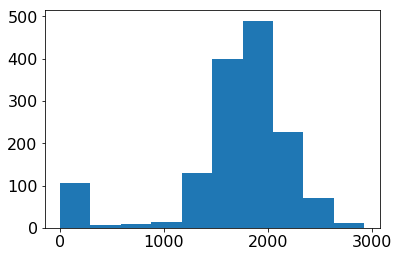

In [10]:
plt.hist(df_fltpairs['uu']['Nv'].values)

In [56]:
def plot_mwd( RA, Dec, c, org=0, ax=None, title='Mollweide projection', 
             projection='mollweide', marker='o', s=10, vmin=0, vmax=None, colorbar=True, cmap=plt.cm.viridis):
    ''' RA, Dec are arrays of the same length.
    RA takes values in [0,360), Dec in [-90,90],
    which represent angles in degrees.
    org is the origin of the plot, 0 or a multiple of 30 degrees in [0,360).
    title is the title of the figure.
    projection is the kind of projection: 'mollweide', 'aitoff', 'hammer', 'lambert'
    
    Examples:
    >>> fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': 'mollweide'}); 
        plot_mwd(ax, x, y, c, title='') 
    '''
    if ax==None:
        fig, ax = plt.subplots(1, 1, figsize=(8, 8), 
                            subplot_kw={'projection': projection}); 
    if vmax is None:
        vmax = c.max()
    
    x = np.remainder(RA+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=-x    # reverse the scale: East to the left
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)
    # fig = plt.figure(figsize=(10, 5))
    # ax = fig.add_subplot(111, projection=projection, facecolor ='LightCyan')
    # ax = fig.add_subplot(111, projection=projection, facecolor ='honeydew')
    sc = ax.scatter(np.radians(x), np.radians(Dec), c=c, s=s,
                    marker=marker, vmin=vmin, vmax=vmax,
                    cmap=cmap)  # convert degrees to radians
    ax.set_xticklabels(tick_labels)     # we add the scale on the x axis
    ax.set_title(title)
    #ax.title.set_fontsize(15)
    ax.set_xlabel("RA")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Dec")
    ax.yaxis.label.set_fontsize(12)
    ax.grid(True)
    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, orientation="horizontal")
        #cbar = plt.colorbar(sc, ax=ax, ticks=np.arange(vmin, vmax, (vmax-vmin)/3 ), orientation='horizontal')
        #cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar
    return ax, cbar
    #cbar.set_clim(-2.0, 2.0)


def pix2radec(nside, ipix, degree=True):
    """from ipix to ra/dec"""
    
    theta, phi = hp.pix2ang(nside, ipix)
    ra = phi
    dec = np.pi/2. - theta
    if degree:
        ra = np.rad2deg(ra)
        dec = np.rad2deg(dec)
    return ra, dec

In [15]:
dbname = 'wfd_depth_scale0.99_v1.5_10yrs.db'
fltpair = 'uu'

df = dataRaw.loc[dbname][fltpair]

In [16]:
df.head()

,pixId,Dkl,FoM_i,Nv
0,1376,8.576503,0.025068,133
1,1377,8.575082,0.014723,78
2,1378,8.576038,0.014709,78
3,1379,8.399323,0.033078,147
4,1380,9.518718,0.005583,76


In [17]:
#starDens = np.load('starDens16.npz')['starDens']

Fields = pd.read_csv("./data/Fields_nside16.csv")
starDens = Fields['starDensity_r25'].values
TRIstarDens = Fields['TRIstarDensity_r25'].values


gr 1462 744
gr 744 114
gr 1428 923
gr 923 32
gr 1463 1115
gr 1115 154
gr 1462 1011
gr 1011 149


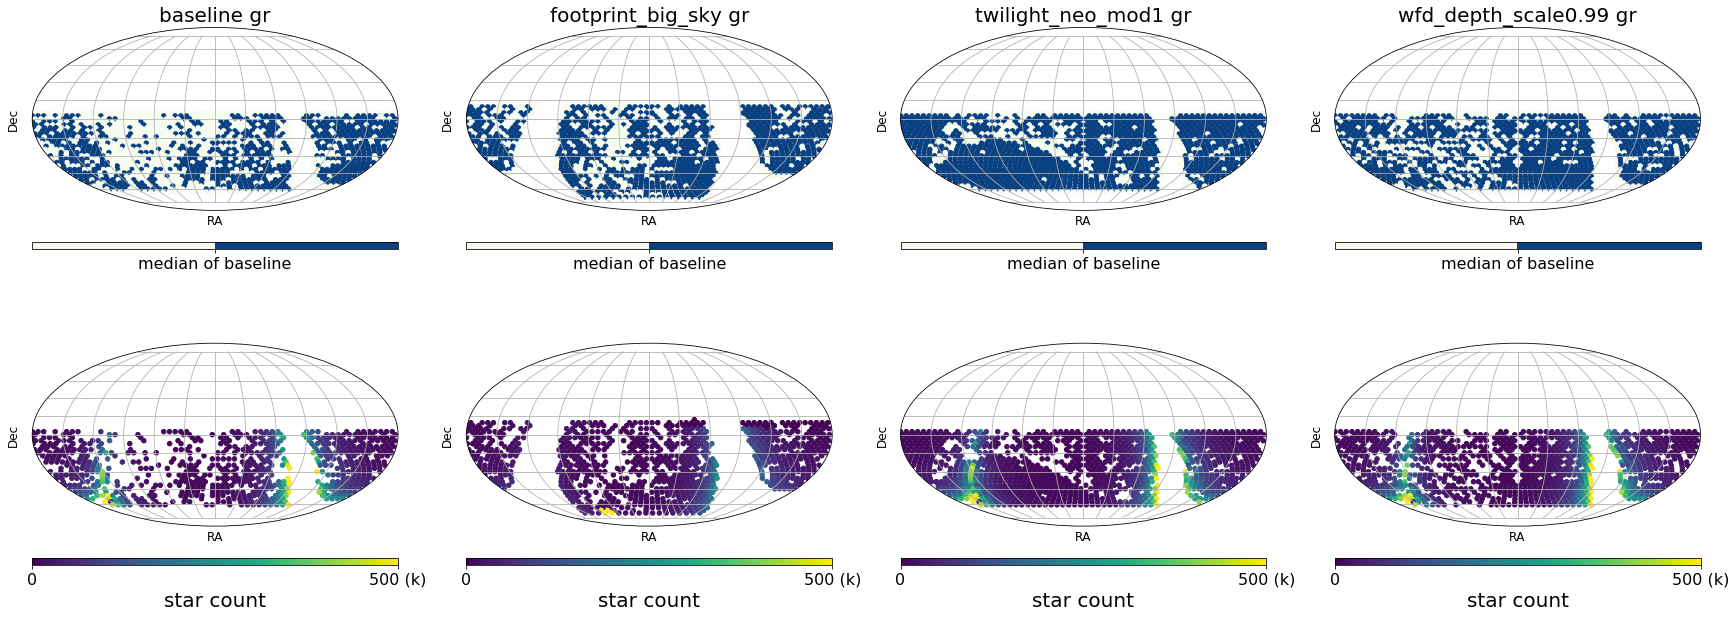

In [57]:
dbnames = [ 
     'baseline_v1.5_10yrs.db',
     'footprint_big_skyv1.5_10yrs.db', 
     'twilight_neo_mod1_v1.5_10yrs.db',
     'wfd_depth_scale0.99_v1.5_10yrs.db', 
     #'baseline_2snaps_v1.5_10yrs.db', 
     ]

fltpair = 'gr'

fig, axs = plt.subplots(2, len(dbnames), figsize=( 6*len(dbnames), 9), subplot_kw={'projection': 'mollweide'}, constrained_layout=True);

axs = axs.flatten()

for i, dbname in enumerate(dbnames):
    thres = Nvth[fltpair]
    
    df = dataRaw.loc[dbname][fltpair]
    
    idx = df.Nv >= thres

    ipix = df['pixId'].values 
    
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = df['Nv'].values
    print(fltpair, len(c), len(c[c>=thres]))
    
    dbname = dbname.replace('_v1.5_10yrs.db', '').replace('v1.5_10yrs.db', '')
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i], title=dbname +' '+fltpair, 
                        vmin=thres, vmax=thres+1, s=20,
                        cmap=plt.cm.get_cmap('GnBu', 2))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([thres + .5])
    cbar.ax.set_xticklabels(['median of baseline'])
    
    # plot star density 
    ipix = ipix[ idx ]
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = TRIstarDens[ipix] / 1000 # in unit (k)
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i + len (dbnames) ], title='', 
                        vmin=0, vmax=500, s=20,
                        cmap=plt.cm.get_cmap('viridis', ))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([0, 500])
    cbar.ax.set_xticklabels([0, '500 (k)'])
    cbar.ax.set_xlabel('star count')


fig.savefig('figures/footprint_wfd.pdf')

gg 1460 785
gg 785 0
gg 1428 1073
gg 1073 1
gg 1461 1327
gg 1327 0
gg 1460 1132
gg 1132 0


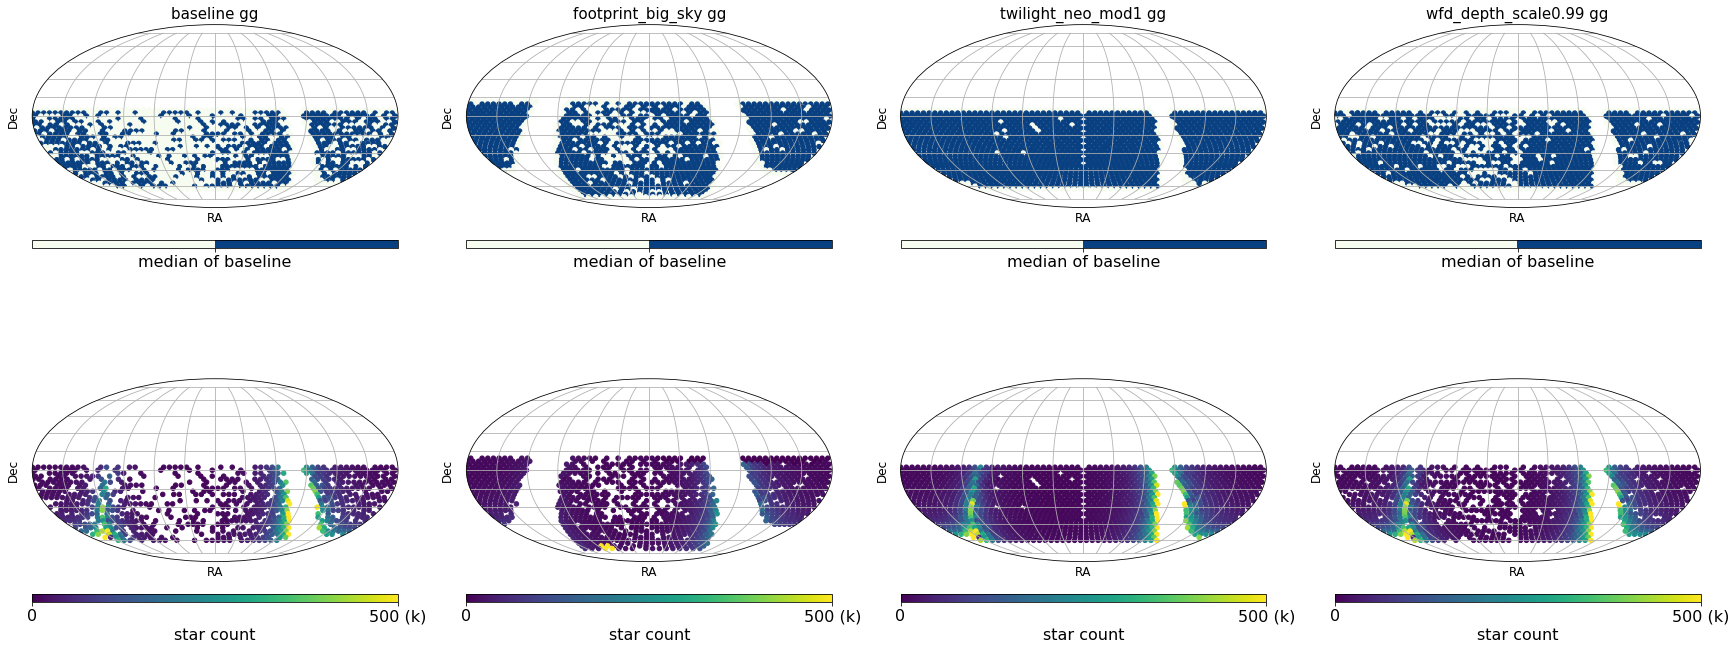

In [43]:
dbnames = [ 
     'baseline_v1.5_10yrs.db',
     'footprint_big_skyv1.5_10yrs.db', 
     'twilight_neo_mod1_v1.5_10yrs.db',
     'wfd_depth_scale0.99_v1.5_10yrs.db', 
     #'footprint_newAv1.5_10yrs.db',
     #'footprint_newBv1.5_10yrs.db',
     #'baseline_2snaps_v1.5_10yrs.db', 
     ]

fltpair = 'gg'

fig, axs = plt.subplots(2, len(dbnames), figsize=( 6*len(dbnames), 10), subplot_kw={'projection': 'mollweide'}, constrained_layout=True);

axs = axs.flatten()

for i, dbname in enumerate(dbnames):
    thres = Nvth[fltpair]
    
    df = dataRaw.loc[dbname][fltpair]
    
    idx = df.Nv >= thres

    ipix = df['pixId'].values 
    
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = df['Nv'].values
    print(fltpair, len(c), len(c[c>=thres]))
    
    dbname = dbname.replace('_v1.5_10yrs.db', '').replace('v1.5_10yrs.db', '')
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i], title=dbname +' '+fltpair, 
                        vmin=thres, vmax=thres+1, s=20,
                        cmap=plt.cm.get_cmap('GnBu', 2))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([thres + .5])
    cbar.ax.set_xticklabels(['median of baseline'])
    
    # plot star density 
    ipix = ipix[ idx ]
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = TRIstarDens[ipix] / 1000 # in unit (k)
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i + len (dbnames) ], title='',
                        vmin=0, vmax=500, s=20,
                        cmap=plt.cm.get_cmap('viridis', ))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([0, 500])
    cbar.ax.set_xticklabels([0, '500 (k)'])
    cbar.ax.set_xlabel('star count')

fig.savefig('figures/footprint_wfd.pdf')

gg 1460 1132
gg 1132 1132
gg 1460 200
gg 200 200
gg 1461 761
gg 761 760


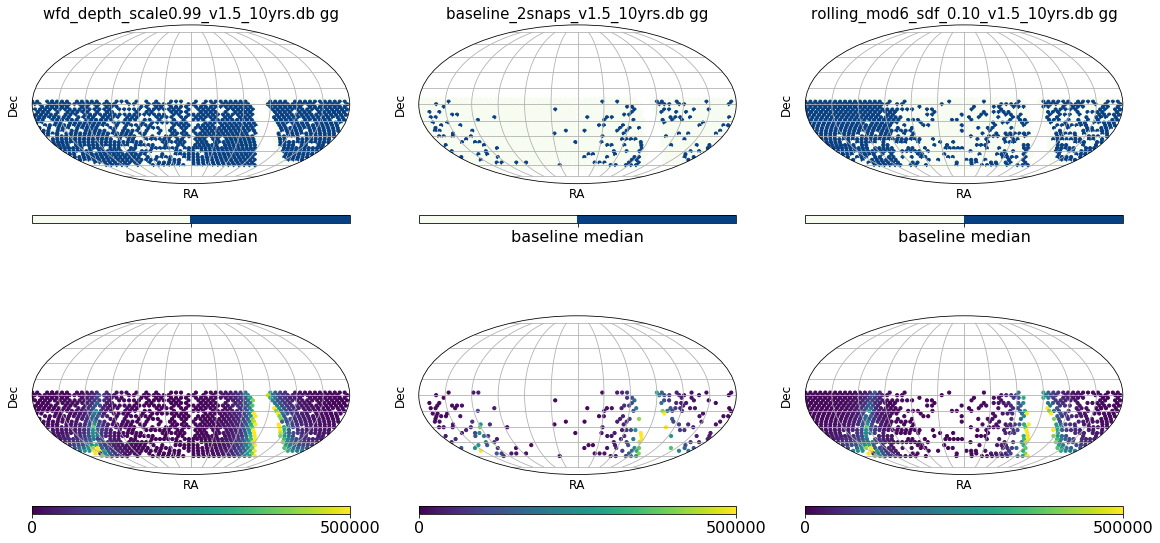

In [178]:
dbnames = [ 'wfd_depth_scale0.99_v1.5_10yrs.db', 
           'baseline_2snaps_v1.5_10yrs.db', 
           'rolling_mod6_sdf_0.10_v1.5_10yrs.db', ]

fltpair = 'gg'

fig, axs = plt.subplots(2, 3, figsize=(16, 8), subplot_kw={'projection': 'mollweide'}, constrained_layout=True);

axs = axs.flatten()

for i, dbname in enumerate(dbnames):
    thres = Nvth[fltpair]
    
    df = dataRaw.loc[dbname][fltpair]
    
    idx = df.Nv >= thres

    ipix = df['pixId'].values 
    
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = df['Nv'].values
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i], title=dbname +' '+fltpair, 
                        vmin=thres, vmax=thres+1, 
                        cmap=plt.cm.get_cmap('GnBu', 2))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([thres + .5])
    cbar.ax.set_xticklabels(['baseline median'])
    
    # plot star density 

    ipix = ipix[ idx ]
    RA, Dec = pix2radec(nside=16, ipix=ipix)
    
    c = starDens[ipix]
    print(fltpair, len(c), len(c[c>=Nvth[fltpair]]))
    
    ax, cbar = plot_mwd(RA, Dec, c, ax=axs[i+3], title=None, 
                        vmin=0, vmax=500000, 
                        cmap=plt.cm.get_cmap('viridis', ))
    ax.set_xticklabels([])     
    ax.set_yticklabels([]) 
    
    cbar.set_ticks([0, 500000])
    #cbar.ax.set_xticklabels(['baseline median'])
    

In [19]:
85/5

17.0

uu 1459


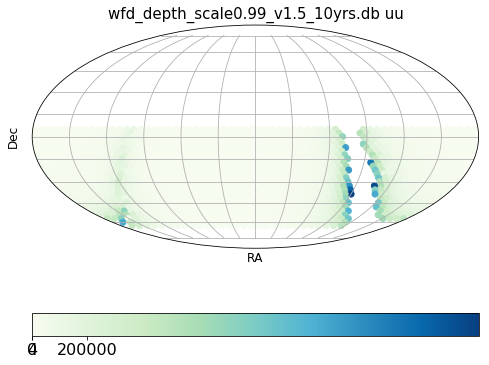

In [137]:

fig, axs = plt.subplots(1, 1, figsize=(8, 8), subplot_kw={'projection': 'mollweide'}, )#constrained_layout=True);

ax = axs
#dbname = dblist_all[3]
#df = dataraw['{}{}'.format(f0,f1)][dbname]
ipix = df['pixId'].values

RA, Dec = pix2radec(nside=16, ipix=ipix)

c = starDens[ipix]
print(fltpair, len(c))

ax, cbar = plot_mwd(RA, Dec, c, ax=ax, title=dbname +' '+fltpair, vmin=0, vmax=None, cmap=plt.cm.get_cmap('GnBu'))
ax.set_xticklabels([])     
ax.set_yticklabels([]) 

cbar.set_ticks([0, 200000, 4])
#cbar.ax.set_xticklabels(['th'])

